# Problem 2, Parts A-B: Boosted Decision Tree

In this Jupyter notebook, we will train a boosted decision tree on the MiniBooNE dataset.

Use this notebook to write your code for problem 1 parts A-B by filling in the sections marked `# TODO` and running all cells.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [2]:
data["data"].columns

Index(['ParticleID_0', 'ParticleID_1', 'ParticleID_2', 'ParticleID_3',
       'ParticleID_4', 'ParticleID_5', 'ParticleID_6', 'ParticleID_7',
       'ParticleID_8', 'ParticleID_9', 'ParticleID_10', 'ParticleID_11',
       'ParticleID_12', 'ParticleID_13', 'ParticleID_14', 'ParticleID_15',
       'ParticleID_16', 'ParticleID_17', 'ParticleID_18', 'ParticleID_19',
       'ParticleID_20', 'ParticleID_21', 'ParticleID_22', 'ParticleID_23',
       'ParticleID_24', 'ParticleID_25', 'ParticleID_26', 'ParticleID_27',
       'ParticleID_28', 'ParticleID_29', 'ParticleID_30', 'ParticleID_31',
       'ParticleID_32', 'ParticleID_33', 'ParticleID_34', 'ParticleID_35',
       'ParticleID_36', 'ParticleID_37', 'ParticleID_38', 'ParticleID_39',
       'ParticleID_40', 'ParticleID_41', 'ParticleID_42', 'ParticleID_43',
       'ParticleID_44', 'ParticleID_45', 'ParticleID_46', 'ParticleID_47',
       'ParticleID_48', 'ParticleID_49'],
      dtype='object')

In [3]:
from xgboost import XGBClassifier

# Implementing BDT model instance
init_param = {"n_estimators": 100,
              "max_depth": 10,
              "learning_rate": 0.1,
              "colsample_bytree": 0.8,
              "subsample": 0.8,
              }
bdt = XGBClassifier(**init_param)

# Fitting training data 
bdt.fit(X_train, y_train)

# retrieve predictions and take index [:, 1] corresponding to signal
preds_bdt = bdt.predict_proba(X_test)[:, 1]

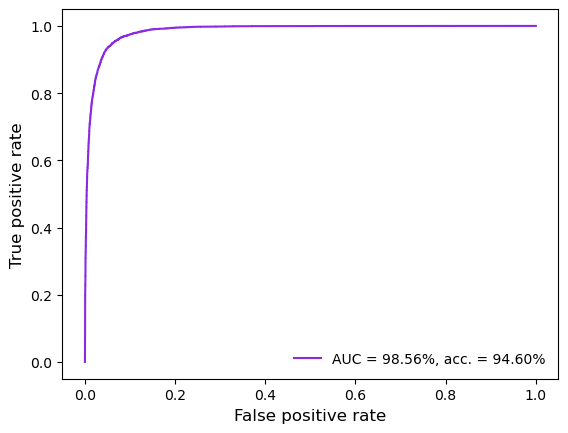

In [4]:
from roc_helper import plot_roc

fig = plot_roc(y_test, preds_bdt)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

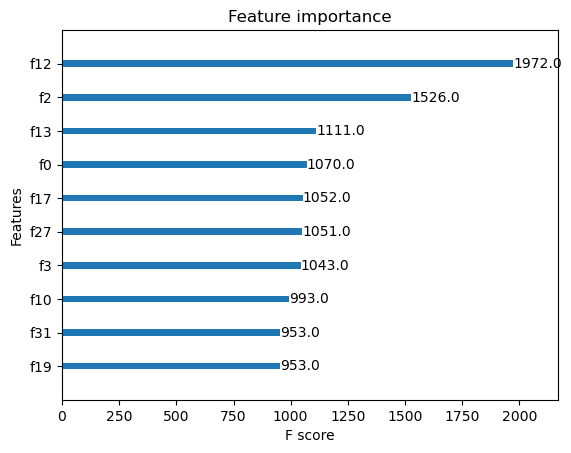

In [78]:
import xgboost as xgb
# ==============================================
# TODO: Plot the importance of the top 10 using
# xgb.plot_importance
# ==============================================

xgb.plot_importance(bdt, grid=False, max_num_features=10)

From the F-score of all the 10 "most important" features, we see that feature f12 is the most important. This corresponds to ParticleID_12, from checking data["data"].columns

In [54]:
data.keys

<function Bunch.keys>

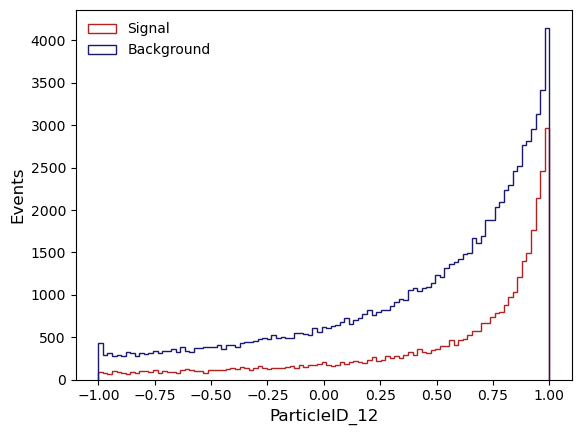

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# ==============================================
# TODO: Plot the most important feature
# separately for signal and background
# using the specified binning
# ==============================================

# using pandas data frame that was kept:
frame = data["frame"]
main_feat_label = "ParticleID_12"
main_feat = frame[main_feat_label].to_numpy()




signal = frame[frame["signal"] == "True"][main_feat_label].to_numpy()
background = frame[frame["signal"] == "False"][main_feat_label].to_numpy()
mask_background = background > -999
mask_signal = signal > -999

xmin = min(np.min(background[mask_background]), np.min(signal[mask_signal]))
xmax = max(np.max(background[mask_background]), np.max(signal[mask_signal]))
n_bins = 100
bins = np.linspace(xmin,xmax, n_bins)

plt.hist(
    signal[mask_signal],
    bins=bins,
    histtype="step",
    color="firebrick",
    label="Signal",
)
plt.hist(
    background[mask_background],
    bins=bins,
    histtype="step",
    color="midnightblue",
    label="Background",
)

plt.xlabel(main_feat_label, fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.legend(frameon=False)
plt.show()


We notice that for the signal and background, the distribution for the signal and the background has the same shape. Moreover the 